###Installing and importing the pacakges and csv file

In [ ]:
!pip install pandas

In [ ]:
#importing csv file

In [ ]:
import pandas as pd

df = pd.read_csv("kddcup.csv")
print(df)


       duration protocol_type  ... dst_host_srv_rerror_rate   label
0             0           tcp  ...                      0.0  normal
1             0           tcp  ...                      0.0  normal
2             0           tcp  ...                      0.0  normal
3             0           tcp  ...                      0.0  normal
4             0           tcp  ...                      0.0  normal
...         ...           ...  ...                      ...     ...
48781         0          icmp  ...                      0.0   smurf
48782         0          icmp  ...                      0.0   smurf
48783         0          icmp  ...                      0.0   smurf
48784         0          icmp  ...                      0.0   smurf
48785         0          icmp  ...                      NaN     NaN

[48786 rows x 42 columns]


In [ ]:
#data preprocessing

#importing the libraries
import os
from pathlib import Path
import pandas as pd
df = pd.read_csv("kddcup.csv")

import warnings
warnings.filterwarnings('ignore')

Viewing the data

In [ ]:
#displays the rows and cols

df.shape

(48786, 42)

In [ ]:
#print few rows and cols in the datasets (first-5)

df.head()

duration protocol_type  ... dst_host_srv_rerror_rate   label
0         0           tcp  ...                      0.0  normal
1         0           tcp  ...                      0.0  normal
2         0           tcp  ...                      0.0  normal
3         0           tcp  ...                      0.0  normal
4         0           tcp  ...                      0.0  normal

[5 rows x 42 columns]

In [ ]:
#print few rows and cols in the datasets (last-5)

df.tail()

duration protocol_type  ... dst_host_srv_rerror_rate  label
48781         0          icmp  ...                      0.0  smurf
48782         0          icmp  ...                      0.0  smurf
48783         0          icmp  ...                      0.0  smurf
48784         0          icmp  ...                      0.0  smurf
48785         0          icmp  ...                      NaN    NaN

[5 rows x 42 columns]

# Getting info about the data


In [ ]:
df.info()

#.info() provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, 
#what type of data is in each column, and how much memory your DataFrame is using.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48786 entries, 0 to 48785
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     48786 non-null  int64  
 1   protocol_type                48786 non-null  object 
 2   service                      48786 non-null  object 
 3   flag                         48786 non-null  object 
 4   src_bytes                    48786 non-null  int64  
 5   dst_bytes                    48786 non-null  int64  
 6   land                         48786 non-null  int64  
 7   wrong_fragment               48786 non-null  int64  
 8   urgent                       48786 non-null  int64  
 9   hot                          48786 non-null  int64  
 10  num_failed_logins            48786 non-null  int64  
 11  logged_in                    48786 non-null  int64  
 12  lnum_compromised             48786 non-null  int64  
 13  lroot_shell     

### Handling Duplicates

In [ ]:
temp_df = df.append(df)

temp_df.shape

(97572, 42)

In [ ]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(38615, 42)

Using append() will return a copy without affecting the original DataFrame. We are capturing this copy in temp so we aren't working with the real data.

Notice call .shape quickly proves our DataFrame rows have doubled.

Now we can try dropping duplicates:

In [ ]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(38615, 42)

In [ ]:
temp_df.drop_duplicates(inplace=True)

###Column Cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [ ]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [ ]:
df.columns = [col.lower() for col in df]

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

### working with the missing values

There are two options in dealing with nulls:

Get rid of rows or columns with nulls
Replace nulls with non-null values, a technique known as imputation

In [ ]:
df.isnull()

duration  protocol_type  ...  dst_host_srv_rerror_rate  label
0         False          False  ...                     False  False
1         False          False  ...                     False  False
2         False          False  ...                     False  False
3         False          False  ...                     False  False
4         False          False  ...                     False  False
...         ...            ...  ...                       ...    ...
48781     False          False  ...                     False  False
48782     False          False  ...                     False  False
48783     False          False  ...                     False  False
48784     False          False  ...                     False  False
48785     False          False  ...                      True   True

[48786 rows x 42 columns]

Notice `isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

To count the number of nulls in each column we use an aggregate function for summing: 

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Removing NaN values


In [ ]:
df.dropna()

duration protocol_type  ... dst_host_srv_rerror_rate   label
0             0           tcp  ...                      0.0  normal
1             0           tcp  ...                      0.0  normal
2             0           tcp  ...                      0.0  normal
3             0           tcp  ...                      0.0  normal
4             0           tcp  ...                      0.0  normal
...         ...           ...  ...                      ...     ...
48780         0          icmp  ...                      0.0   smurf
48781         0          icmp  ...                      0.0   smurf
48782         0          icmp  ...                      0.0   smurf
48783         0          icmp  ...                      0.0   smurf
48784         0          icmp  ...                      0.0   smurf

[48785 rows x 42 columns]

In [ ]:
#Other than just dropping rows, you can also drop columns with null values by setting axis=1:

df.dropna(axis=1)

duration protocol_type  ... srv_diff_host_rate dst_host_count
0             0           tcp  ...                0.0              9
1             0           tcp  ...                0.0             19
2             0           tcp  ...                0.0             29
3             0           tcp  ...                0.0             39
4             0           tcp  ...                0.0             49
...         ...           ...  ...                ...            ...
48781         0          icmp  ...                0.0            255
48782         0          icmp  ...                0.0            255
48783         0          icmp  ...                0.0            255
48784         0          icmp  ...                0.0            255
48785         0          icmp  ...                0.0             25

[48786 rows x 32 columns]

In [ ]:
df.shape


(48786, 42)

### Imputation

Imputation is a conventional feature engineering technique used to keep valuable data that have null values. 

There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the **mean** or the **median** of that column. 



In [ ]:
#understanding the variables

df.describe()

#describe() can also be used on a categorical variable to get the count of rows,
# unique count of categories, top category, and freq of top category:

duration  ...  dst_host_srv_rerror_rate
count  48786.000000  ...              48785.000000
mean       3.224860  ...                  0.020032
std      164.770157  ...                  0.133367
min        0.000000  ...                  0.000000
25%        0.000000  ...                  0.000000
50%        0.000000  ...                  0.000000
75%        0.000000  ...                  0.000000
max    15127.000000  ...                  1.000000

[8 rows x 38 columns]

In [ ]:
df.head()

duration protocol_type  ... dst_host_srv_rerror_rate   label
0         0           tcp  ...                      0.0  normal
1         0           tcp  ...                      0.0  normal
2         0           tcp  ...                      0.0  normal
3         0           tcp  ...                      0.0  normal
4         0           tcp  ...                      0.0  normal

[5 rows x 42 columns]

In [ ]:

df['service'].describe()

count     48786
unique       29
top        http
freq      33288
Name: service, dtype: object

In [ ]:
#df['service'].describe()

df['service'].value_counts().head(10)



http        33288
ecr_i        9404
smtp         2839
domain_u     1083
ftp_data      929
private       303
eco_i         204
finger        158
ftp           149
ntp_u         149
Name: service, dtype: int64

#### Relationships between continuous variables



In [ ]:
#By using the correlation method `.corr()` we can generate the relationship between each continuous variable

df.corr()

duration  ...  dst_host_srv_rerror_rate
duration                     1.000000  ...                  0.002371
src_bytes                   -0.000036  ...                  0.010546
dst_bytes                    0.021492  ...                 -0.014109
land                        -0.000089  ...                 -0.000680
wrong_fragment              -0.000930  ...                 -0.007136
urgent                       0.003998  ...                 -0.000912
hot                          0.007896  ...                  0.013810
num_failed_logins            0.002720  ...                  0.151820
logged_in                    0.002510  ...                 -0.227799
lnum_compromised             0.418498  ...                  0.000362
lroot_shell                  0.178362  ...                 -0.000916
lsu_attempted                0.371659  ...                 -0.000912
lnum_root                    0.416742  ...                 -0.001106
lnum_file_creations          0.583503  ...                  0.000173
lnum_shells                  0.001001  ...                 -0.000530
lnum_access_files            0.238503  ...                 -0.007118
lnum_outbound_cmds                NaN  ...                       NaN
is_host_login                     NaN  ...                       NaN
is_guest_login               0.008742  ...                 -0.004541
count                       -0.010276  ...                 -0.077421
srv_count                   -0.010513  ...                 -0.080462
serror_rate                 -0.000844  ...                  0.002382
srv_serror_rate             -0.001024  ...                  0.000334
rerror_rate                 -0.002807  ...                  0.965965
srv_rerror_rate             -0.002928  ...                  0.951292
same_srv_rate                0.000172  ...                 -0.050160
diff_srv_rate               -0.000261  ...                  0.012036
srv_diff_host_rate          -0.004945  ...                  0.051266
dst_host_count              -0.009090  ...                 -0.174886
dst_host_srv_count          -0.054952  ...                 -0.130672
dst_host_same_srv_rate      -0.061818  ...                 -0.042291
dst_host_diff_srv_rate       0.027912  ...                  0.149013
dst_host_same_src_port_rate -0.008365  ...                 -0.002083
dst_host_srv_diff_host_rate  0.002805  ...                  0.458767
dst_host_serror_rate         0.007922  ...                  0.007433
dst_host_srv_serror_rate     0.027384  ...                  0.012160
dst_host_rerror_rate         0.006646  ...                  0.951234
dst_host_srv_rerror_rate     0.002371  ...                  1.000000

[38 rows x 38 columns]

In [ ]:
df.head()

duration protocol_type  ... dst_host_srv_rerror_rate   label
0         0           tcp  ...                      0.0  normal
1         0           tcp  ...                      0.0  normal
2         0           tcp  ...                      0.0  normal
3         0           tcp  ...                      0.0  normal
4         0           tcp  ...                      0.0  normal

[5 rows x 42 columns]

###DataFrame slicing, selecting, extracting

In [ ]:
#by columns

  
service_col = df['service']

type(service_col)

pandas.core.series.Series

In [ ]:
  
service_col = df[['service']]

type(service_col)

pandas.core.frame.DataFrame

In [ ]:
#*Since* it's just a list, adding another column name is easy:

subset = df[['service', 'src_bytes']]

subset.head()

service  src_bytes
0    http        181
1    http        239
2    http        235
3    http        219
4    http        217

In [ ]:
#alpha = df.["http"]

#alpha

In [ ]:
condition = (df['service'] == "http")

condition.head()

0    True
1    True
2    True
3    True
4    True
Name: service, dtype: bool

In [ ]:
df[df['service'] == "http"].head()

duration protocol_type  ... dst_host_srv_rerror_rate   label
0         0           tcp  ...                      0.0  normal
1         0           tcp  ...                      0.0  normal
2         0           tcp  ...                      0.0  normal
3         0           tcp  ...                      0.0  normal
4         0           tcp  ...                      0.0  normal

[5 rows x 42 columns]

In [ ]:
df[df['service'] == "ftp"].head()

duration protocol_type  ... dst_host_srv_rerror_rate   label
767        27           tcp  ...                      0.0  normal
769        25           tcp  ...                      0.0  normal
770        20           tcp  ...                      0.0  normal
771        27           tcp  ...                      0.0  normal
772        20           tcp  ...                      0.0  normal

[5 rows x 42 columns]

In [ ]:
df[df['service'] == "finger"].head()

duration protocol_type  ... dst_host_srv_rerror_rate   label
209         0           tcp  ...                      0.0  normal
726         0           tcp  ...                      0.0  normal
755         0           tcp  ...                      0.0  normal
759         0           tcp  ...                      0.0  normal
783         0           tcp  ...                      0.0  normal

[5 rows x 42 columns]

### Functions



In [ ]:
#def rating_function(x):
 #   if x >= 8.0:
  #      return "good"
   # else:
    #    return "bad"

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

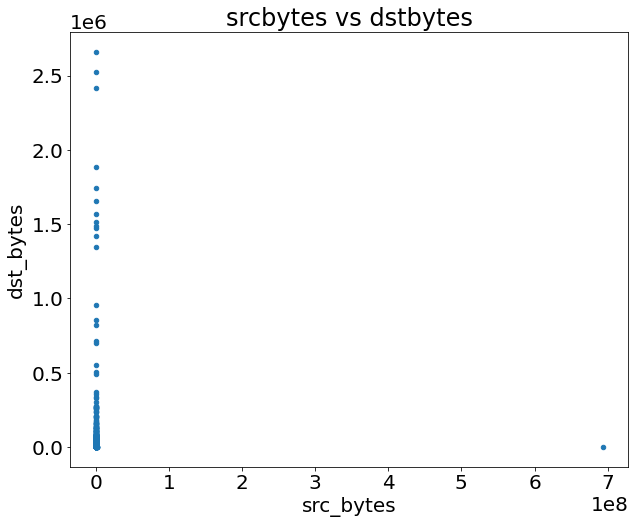

In [ ]:
df.plot(kind='scatter', x='src_bytes', y='dst_bytes', title='srcbytes vs dstbytes');

In [ ]:
df['src_bytes'].plot(kind='src_bytes', title='src_bytes graph');

ValueError: ignored